In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras.backend as K
%matplotlib inline

/home/kopita/anaconda3/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

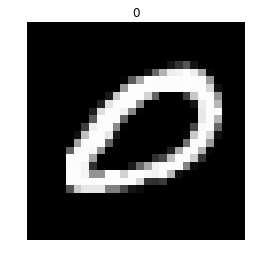

In [3]:
random_idx = np.random.choice(60000)
plt.imshow(x_train[random_idx], 'gray')
plt.title(y_train[random_idx])
plt.axis('off');

In [4]:
# Preprocesar las imagenes
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

# Agregamos una dimensión para los canales de la imagen, dado
# que la imagen esta en escala de grises, tiene solo un canal
x_train = x_train[..., None]
x_test = x_test[..., None]

x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [5]:
y_train[0]

5

In [6]:
# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Usando una red convolucional

In [7]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax', input_shape=(784,)))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [8]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 384us/step - loss: 1.8532 - acc: 0.5264 - val_loss: 0.8902 - val_acc: 0.8124
Epoch 2/5
60000/60000 [==============================] - 23s 375us/step - loss: 0.5536 - acc: 0.8584 - val_loss: 0.3842 - val_acc: 0.8920
Epoch 3/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.3522 - acc: 0.9013 - val_loss: 0.3030 - val_acc: 0.9169
Epoch 4/5
60000/60000 [==============================] - 23s 382us/step - loss: 0.2873 - acc: 0.9180 - val_loss: 0.2484 - val_acc: 0.9318
Epoch 5/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.2457 - acc: 0.9302 - val_loss: 0.2194 - val_acc: 0.9371


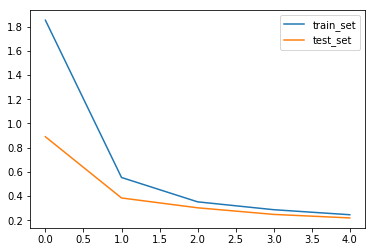

In [9]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

# Visualizando los filtros

In [10]:
kernels = model.layers[0].kernel
kernels

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 16) dtype=float32_ref>

In [11]:
kernels = K.eval(kernels)
kernels.shape

(3, 3, 1, 16)

In [12]:
kernels = kernels[:,:,0,:]
kernels.shape

(3, 3, 16)

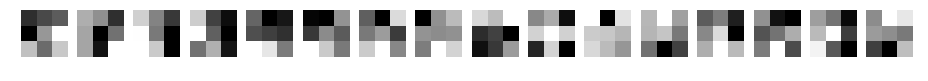

In [13]:
fig, axes = plt.subplots(1, kernels.shape[2], figsize=(16,4))

for i in range(kernels.shape[2]):
    axes[i].imshow(kernels[:,:,i], 'gray')
    axes[i].axis('off')